## Import packages

In [64]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import seaborn as sns
sns.set()

## Data

In [66]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']



num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

scaled_test_data = mnist_test.map(scale)

In [67]:
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [68]:
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

## Model
### Outline the model

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU(), input_shape=(28,28,1)),
    tf.keras.layers.AveragePooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(10, activation='softmax')
])

tf.keras.layers

<module 'tensorflow.keras.layers' from '/Users/seanpaterson/opt/anaconda3/envs/py3.7-TF2.0/lib/python3.7/site-packages/tensorflow/keras/layers/__init__.py'>

### Choose the optimiser and loss function

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [77]:
NUM_EPOCHS = 20

EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(train_data, 
          epochs=NUM_EPOCHS, 
          callbacks = [EARLY_STOPPING],
          validation_data=(validation_inputs, validation_targets))

Epoch 1/20
540/540 [==============================] - 29s 52ms/step - loss: 0.4183 - accuracy: 0.8703 - val_loss: 0.0717 - val_accuracy: 0.9788
Epoch 2/20
540/540 [==============================] - 29s 54ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 3/20
540/540 [==============================] - 30s 55ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 4/20
540/540 [==============================] - 30s 55ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 5/20
540/540 [==============================] - 31s 56ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0299 - val_accuracy: 0.9922
Epoch 6/20
540/540 [==============================] - 30s 56ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0346 - val_accuracy: 0.9922
Epoch 7/20
540/540 [==============================] - 31s 56ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0254 - val_accuracy:

## Test

1/1 [==============================] - 1s 1s/step - loss: 0.0279 - accuracy: 0.9921


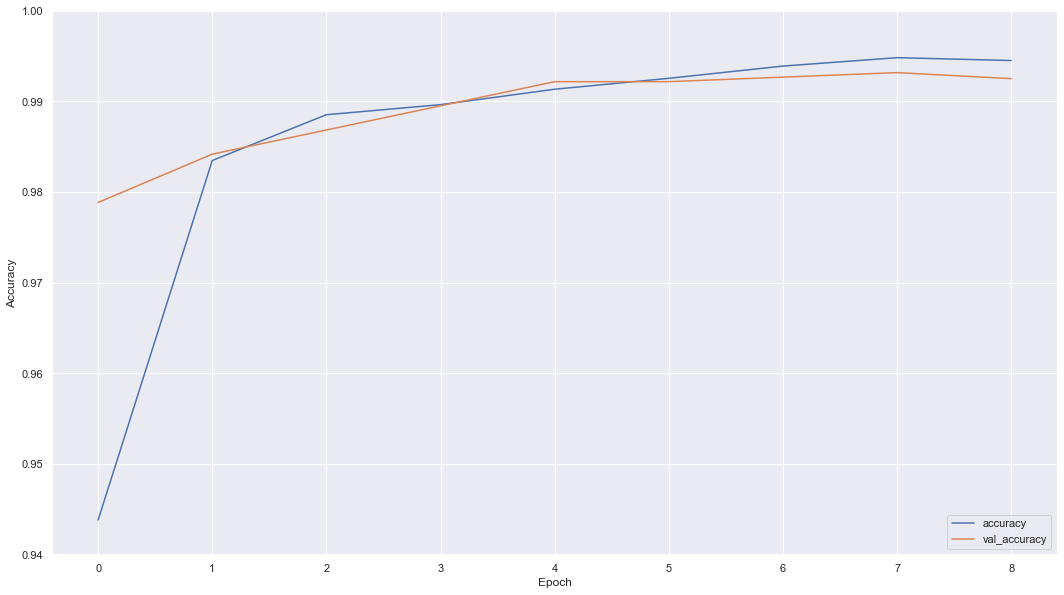

In [80]:
plt.figure(figsize=(18,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(test_data)

In [79]:
print('Test loss: {0:.02f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

Test loss: 0.03. Test accuracy: 99.21%
